In [1]:
import os, shutil
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models, optimizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import imageio

In [2]:
original_dataset_dir = './home_images/original_images'
base_dir = './home_images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_ahmed_dir = os.path.join(train_dir, 'Ahmed')
train_inam_dir = os.path.join(train_dir, 'Inam')
validation_ahmed_dir = os.path.join(validation_dir, 'Ahmed')
validation_inam_dir = os.path.join(validation_dir, 'Inam')

In [3]:
print('total training Ahmed images:', len(os.listdir(train_ahmed_dir)))
print('total training Inam images:', len(os.listdir(train_inam_dir)))
print('total validation Ahmed images:', len(os.listdir(validation_ahmed_dir)))
print('total validation Inam images:', len(os.listdir(validation_inam_dir)))

total training Ahmed images: 0
total training Inam images: 0
total validation Ahmed images: 0
total validation Inam images: 0


./home_images/original_images\Ahmed-1.jpg


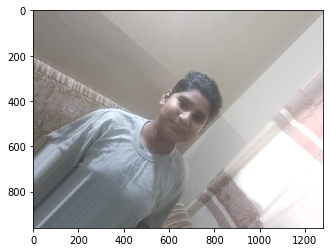

In [14]:
file_sample = os.path.join(original_dataset_dir, os.listdir(original_dataset_dir)[0])
print(file_sample)
img = plt.imread(file_sample)
data_generator = ImageDataGenerator()
tr_img = data_generator.apply_transform(img, {'theta': 90., 'shear': 30})
plt.imshow(tr_img);

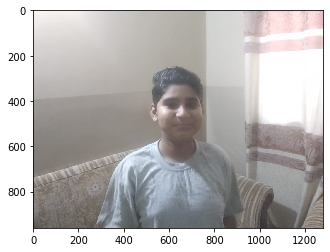

In [5]:
plt.imshow(img);

In [16]:
ahmed_files = ['Ahmed-{}.jpg'.format(i) for i in range(1, 10)]
data_generator = ImageDataGenerator()
for file in ahmed_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)
    
    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(train_ahmed_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)
    
    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(train_ahmed_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)
    
    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(train_ahmed_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)
    
    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(train_ahmed_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)
    
    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(train_ahmed_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)

        
inam_files = ['Inam-{}.jpg'.format(i) for i in range(1, 10)]
data_generator = ImageDataGenerator()
for file in inam_files:
    src_file_path = os.path.join(original_dataset_dir, file)
    img = plt.imread(src_file_path)
    
    flipped_hor_img = data_generator.apply_transform(img, {'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_image-")
    dst_file_path = os.path.join(train_inam_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_img)
    
    flipped_ver_img = data_generator.apply_transform(img, {'flip_vertical': True})
    file_dst = file.replace("-", "-flipped_vertical_image-")
    dst_file_path = os.path.join(train_inam_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_ver_img)
    
    flipped_hor_ver_img = data_generator.apply_transform(img, {'flip_vertical': True, 'flip_horizontal': True})
    file_dst = file.replace("-", "-flipped_horizontal_vertical_image-")
    dst_file_path = os.path.join(train_inam_dir, file_dst)
    imageio.imwrite(dst_file_path, flipped_hor_ver_img)
    
    sheared_img = data_generator.apply_transform(img, {'shear': 30})
    file_dst = file.replace("-", "-sheared_image-")
    dst_file_path = os.path.join(train_inam_dir, file_dst)
    imageio.imwrite(dst_file_path, sheared_img)
    
    for angle in range(0, 360, 30):
        rotated_img = data_generator.apply_transform(img, {'theta': angle})
        file_dst = file.replace("-", "-" + str(angle) + "-")
        dst_file_path = os.path.join(train_inam_dir, file_dst)
        imageio.imwrite(dst_file_path, rotated_img)

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [31]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [32]:
train_datagen =  ImageDataGenerator(
rescale=1./255,
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=4, 
    class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=2, 
    class_mode='binary')

Found 256 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


data batch shape: (4, 150, 150, 3)
labels batch shape: (4,)
[0. 0. 1. 1.]


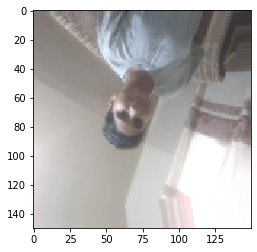

In [22]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    plt.imshow(data_batch[1])
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch)
    break

In [33]:
history = model.fit(
train_generator,
steps_per_epoch=16,
epochs=16,
validation_data=validation_generator,
validation_steps=16)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 16 steps, validate for 16 steps
Epoch 1/16
16/16 [==============================] - 6s 348ms/step - loss: 0.8213 - acc: 0.3906 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 2/16
16/16 [==============================] - 4s 269ms/step - loss: 0.6954 - acc: 0.4375 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/16
16/16 [==============================] - 5s 292ms/step - loss: 0.6945 - acc: 0.5000 - val_loss: 0.6929 - val_acc: 0.5000
Epoch 4/16
16/16 [==============================] - 4s 271ms/step - loss: 0.6918 - acc: 0.5938 - val_loss: 0.6899 - val_acc: 0.5625
Epoch 5/16
16/16 [==============================] - 5s 293ms/step - loss: 0.7066 - acc: 0.4844 - val_loss: 0.6926 - val_acc: 0.5000
Epoch 6/16
16/16 [==============================] - 4s 277ms/step - loss: 0.6933 - acc: 0.5156 - val_loss: 0.6926 - val_acc: 0.7188
Epoch 7/16
16/16 [==============================] - 5s 283ms/step - loss: 0.6913 - acc: 0.6094 - val_loss: 0.6895 - 